In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
df = pd.read_csv('ex2data2.txt', sep=',', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       118 non-null    float64
 1   1       118 non-null    float64
 2   2       118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [4]:
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


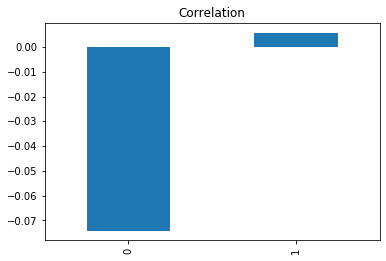

In [5]:
df.corr()[2][:-1].plot.bar(title='Correlation')

# Creating the Algorithm

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,2]

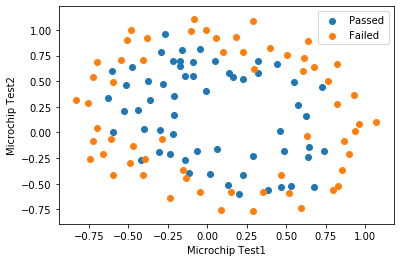

In [7]:
mask = y == 1
plt.scatter(X[mask][0].values, X[mask][1].values, label='Passed')
plt.scatter(X[~mask][0].values, X[~mask][1].values, label='Failed')
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend()
plt.show()

In [8]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

In [9]:
# from sklearn.preprocessing import PolynomialFeatures

# poly= PolynomialFeatures(6)
# X = poly.fit_transform(X)

In [10]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [11]:
def cost_function(theta, x,y, lambda_):
     z = np.dot(x,theta)
     h = sigmoid(z)
     j = (-1/m) * (np.dot(y.T,np.log(h)) + np.dot((1-y).T, np.log(1-h)))
     reg = (lambda_/(2*m)) * np.dot(theta[1:].T, theta[1:])
     return j+reg

In [12]:
def gradient(theta,x,y, lambda_):
    z = np.dot(x,theta)
    h = sigmoid(z)
    diff = h-y
    grad = (1/m) * np.dot(X.T, diff)
    grad[1:] = grad[1:] + (lambda_/m) * theta[1:]
    return grad

In [13]:
(m, n) = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n,1))
lmbda = 2

In [14]:
cost_function(theta, X,y,lmbda)

array([[0.69314718]])

# Model

In [15]:
temp = opt.fmin_tnc(cost_function,theta.flatten(), gradient, args=(X, y.flatten(), lmbda))

In [16]:
theta_opt = temp[0]

In [17]:
theta_opt.shape

(28,)

In [18]:
cost_function(theta_opt, X, y,lmbda)

array([0.57339845])

# Evaluating the model

In [19]:
z = np.dot(X,theta_opt)
pred = sigmoid(z)

In [20]:
pred = (pred.reshape(-1,1) >= 0.5).astype(np.float64)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        60
           1       0.77      0.93      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.85      0.83      0.83       118

[[44 16]
 [ 4 54]]
